# Film Success Analysis: Language ,Budget and Movie Category

### Author : Kareko Cynthia Vanessa

# Business understanding
In response to the evolving landscape of the entertainment industry, Microsoft embarked on an initiative to establish its own movie studio. The objective was to explore the creation of original video content. This project aimed to provide actionable insights to guide Microsoft's new movie studio in deciding what types of films to create.

# Data Analysis Questions
1.Franchise vs standalone movies popularity - We aim to provide insights into the prevalence and success of franchises in the industry.Are franchises more successful than stand alone movies?

2.Original Language popularity - We aim to provide insights into the distribution of movies by language.Does the language influence movie popularity?

3.Budget vs Gross earnings.Visualized relationship between production budget and gross earnings.Do higher budget movies return higher gross earnings?

# Data Understanding
The data used was sourced from popular movie data sites i.e Box Office Mojo (Box Office), The Movie Database (TMDb), and The Numbers (TN). 
The datasets contain columns and key variables helpful to our analysis;Movie title,original language,domestic gross,worlwide gross,popularity and production budget.

# Data exploration and preparation

In [175]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bom movie gross data

In [176]:
# loading dataset
bom_df = pd.read_csv("bom.movie_gross.csv")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [177]:
bom_df.shape # returns (3387,5)

(3387, 5)

In [178]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [179]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [180]:
# checking for missing values
missing_values = bom_df.isnull().sum()
missing_values


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [181]:
# dropping null values
bom_df = bom_df.dropna(subset = ["studio"])
bom_df.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [182]:
# dropping unnecessary columns
cols_to_drop = ["domestic_gross","foreign_gross","year"]
cols = [col for col in bom_df.columns if col not in cols_to_drop]
bom_df = bom_df[cols]
bom_df

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


# TMDB Movie Data

In [183]:
# loading dataset
tmdb_df = pd.read_csv("tmdb.movies.csv" , index_col = 0)
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [184]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [185]:
tmdb_df.shape # returns (26517 ,9)

(26517, 9)

In [186]:
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [187]:
# checking for duplicates
tmdb_df.duplicated().value_counts()

False    25497
True      1020
Name: count, dtype: int64

In [188]:
tmdb_df[tmdb_df.duplicated(keep = False)].sort_values(by = "id")

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
20626,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
14173,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
24000,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
20639,"[28, 53, 878]",280,en,Terminator 2: Judgment Day,24.604,1991-07-03,Terminator 2: Judgment Day,7.9,6682
...,...,...,...,...,...,...,...,...,...
17071,[27],560717,en,Requiem,0.600,2015-01-01,Requiem,5.0,1
23685,[35],564441,en,Adopting Trouble,0.600,2016-04-08,Adopting Trouble,4.0,2
20461,[35],564441,en,Adopting Trouble,0.600,2016-04-08,Adopting Trouble,4.0,2
23785,[99],572012,en,Harvested Alive - 10 Years of Investigations,0.600,2016-11-28,Harvested Alive,1.0,1


In [189]:
# dropping duplicates
tmdb_df = tmdb_df.drop_duplicates()
tmdb_df.duplicated().value_counts()

False    25497
Name: count, dtype: int64

In [190]:
tmdb_df.loc[:,"release_date"] = pd.to_datetime(tmdb_df["release_date"])

In [191]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [192]:
# dropping unnecessary columns
cols_to_drop = ["id","release_date","original_title"]
cols = [col for col in tmdb_df if col not in cols_to_drop]
tmdb_df = tmdb_df[cols]
tmdb_df

,genre_ids,original_language,popularity,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,Inception,8.3,22186
...,...,...,...,...,...,...
26512,"[27, 18]",en,0.600,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,0.600,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,0.600,The Last One,0.0,1
26515,"[10751, 12, 28]",en,0.600,Trailer Made,0.0,1


# TN Movie Budgets Data

In [193]:
# loading dataset
tn_budgets_df = pd.read_csv("tn.movie_budgets.csv")
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [194]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [195]:
tn_budgets_df.shape # returns (5782 ,6)

(5782, 6)

In [196]:
tn_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [197]:
# checking for duplicates
tn_budgets_df.duplicated().value_counts()

False    5782
Name: count, dtype: int64

In [198]:
clean_and_convert = ["production_budget","domestic_gross","worldwide_gross"]

In [199]:
tn_budgets_df["release_date"] = pd.to_datetime(tn_budgets_df["release_date"])

In [200]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [201]:
# dropping unnecessary columns
cols_to_drop = ["release_date", "id"]
cols =[ col for col in tn_budgets_df if col not in cols_to_drop]
tn_budgets_df = tn_budgets_df[cols]
tn_budgets_df

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


# Merging Tables

In [202]:
# merging tables
merged_bom_df_tmdb_df = pd.merge(bom_df ,tmdb_df,left_on = "title",right_on = "title",how = "inner")
merged_bom_df_tmdb_df

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368
...,...,...,...,...,...,...,...
2450,The Escape,IFC,"[53, 28]",en,0.600,7.0,1
2451,The Escape,IFC,"[53, 28]",en,1.176,6.6,10
2452,Souvenir,Strand,"[35, 18]",fr,2.130,5.8,14
2453,The Quake,Magn.,[12],no,11.051,6.7,81


In [203]:
merged_bom_df_tmdb_df= pd.merge(merged_bom_df_tmdb_df,tn_budgets_df,left_on = "title",right_on = "movie",how = "inner")
merged_bom_df_tmdb_df

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,Gotti,"$10,000,000","$4,286,367","$6,089,100"
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1267,Mandy,RLJ,[18],en,0.600,3.5,2,Mandy,"$6,000,000","$1,214,525","$1,427,656"
1268,Mandy,RLJ,"[28, 53, 27, 14, 9648]",en,16.240,6.2,618,Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [204]:
# dropping columns
cols_to_drop = ["movie_y", "production_budget_y","domestic_gross_y","worldwide_gross_y","movie_x","production_budget_x","domestic_gross_x","worldwide_gross_x"]
cols =[ col for col in merged_bom_df_tmdb_df if col not in cols_to_drop]
merged_bom_df_tmdb_df = merged_bom_df_tmdb_df[cols]
merged_bom_df_tmdb_df

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,Gotti,"$10,000,000","$4,286,367","$6,089,100"
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1267,Mandy,RLJ,[18],en,0.600,3.5,2,Mandy,"$6,000,000","$1,214,525","$1,427,656"
1268,Mandy,RLJ,"[28, 53, 27, 14, 9648]",en,16.240,6.2,618,Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [236]:
 merged_bom_df_tmdb_df.drop_duplicates(inplace = True)

In [206]:
merged_bom_df_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1270 non-null   object 
 1   studio             1270 non-null   object 
 2   genre_ids          1270 non-null   object 
 3   original_language  1270 non-null   object 
 4   popularity         1270 non-null   float64
 5   vote_average       1270 non-null   float64
 6   vote_count         1270 non-null   int64  
 7   movie              1270 non-null   object 
 8   production_budget  1270 non-null   object 
 9   domestic_gross     1270 non-null   object 
 10  worldwide_gross    1270 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 109.3+ KB


In [207]:
merged_bom_df_tmdb_df.describe()

,popularity,vote_average,vote_count
count,1270.000000,1270.000000,1270.000000
mean,12.907085,6.350551,2200.734646
std,8.085367,0.928243,2901.482743
min,0.600000,0.000000,1.000000
25%,8.290500,5.800000,393.250000
50%,11.243000,6.350000,1106.500000
75%,15.759000,6.900000,2796.250000
max,80.773000,10.000000,22186.000000


In [208]:
# checking for duplicates in title 
merged_bom_df_tmdb_df["title"].duplicated().value_counts()

title
False    1169
True      101
Name: count, dtype: int64

In [209]:
# dropping movie column
merged_bom_df_tmdb_df = merged_bom_df_tmdb_df.drop("movie", axis = 1)

In [210]:
merged_bom_df_tmdb_df.head()

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$312,433,331","$621,156,389"


In [211]:
# dropping duplicates in title
merged_bom_df_tmdb_df = merged_bom_df_tmdb_df.drop_duplicates(subset = ["title"])
merged_bom_df_tmdb_df.shape  # returns (1169 ,10)

(1169, 10)

In [212]:
merged_bom_df_tmdb_df.info

<bound method DataFrame.info of                            title     studio                genre_ids  \
0                    Toy Story 3         BV          [16, 10751, 35]   
1                      Inception         WB            [28, 878, 12]   
2            Shrek Forever After       P/DW  [35, 12, 14, 16, 10751]   
3     The Twilight Saga: Eclipse       Sum.      [12, 14, 18, 10749]   
4                     Iron Man 2       Par.            [12, 28, 878]   
...                          ...        ...                      ...   
1264                   Destroyer  Annapurna         [53, 80, 18, 28]   
1265                       Gotti         VE         [80, 18, 36, 53]   
1266  Bilal: A New Breed of Hero         VE             [28, 12, 16]   
1267                       Mandy        RLJ                     [18]   
1269                Lean on Pete        A24                 [18, 12]   

     original_language  popularity  vote_average  vote_count  \
0                   en      24.445     

In [213]:
merged_bom_df_tmdb_df.describe()

,popularity,vote_average,vote_count
count,1169.000000,1169.000000,1169.000000
mean,13.179376,6.362019,2249.816082
std,7.871465,0.848454,2897.497438
min,0.600000,1.000000,1.000000
25%,8.523000,5.900000,431.000000
50%,11.369000,6.400000,1190.000000
75%,15.889000,6.900000,2876.000000
max,80.773000,10.000000,22186.000000


# 1.Evaluating Franchise Success

In [214]:
# creating a copy of original dataframe
franchise_success = merged_bom_df_tmdb_df.copy()
franchise_success

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...
1264,Destroyer,Annapurna,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$1,533,324","$3,681,096"
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$4,286,367","$6,089,100"
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$490,973","$648,599"
1267,Mandy,RLJ,[18],en,0.600,3.5,2,"$6,000,000","$1,214,525","$1,427,656"


In [215]:
def categorize_franchise(title):
    franchise_keywords = ['sequel', 'franchise', 'part', '2', '3' ,'I','II','III','returns' ,':','awakens','remake','rises','chronicles','saga','revenge','forever_frafter','origin','beginning','last','final'] 
    for keyword in franchise_keywords:
        if keyword in title.lower():
            return 'Franchise'
    return 'Standalone'

franchise_success['franchise'] = franchise_success['title'].apply(categorize_franchise)
franchise_success

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,franchise
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$415,004,880","$1,068,879,522",Franchise
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$292,576,195","$835,524,642",Standalone
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$238,736,787","$756,244,673",Standalone
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$300,531,751","$706,102,828",Franchise
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$312,433,331","$621,156,389",Franchise
...,...,...,...,...,...,...,...,...,...,...,...
1264,Destroyer,Annapurna,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$1,533,324","$3,681,096",Standalone
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$4,286,367","$6,089,100",Standalone
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$490,973","$648,599",Franchise
1267,Mandy,RLJ,[18],en,0.600,3.5,2,"$6,000,000","$1,214,525","$1,427,656",Standalone


In [216]:
franchise_success[['title', 'franchise', 'domestic_gross', 'worldwide_gross']]

,title,franchise,domestic_gross,worldwide_gross
0,Toy Story 3,Franchise,"$415,004,880","$1,068,879,522"
1,Inception,Standalone,"$292,576,195","$835,524,642"
2,Shrek Forever After,Standalone,"$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Franchise,"$300,531,751","$706,102,828"
4,Iron Man 2,Franchise,"$312,433,331","$621,156,389"
...,...,...,...,...
1264,Destroyer,Standalone,"$1,533,324","$3,681,096"
1265,Gotti,Standalone,"$4,286,367","$6,089,100"
1266,Bilal: A New Breed of Hero,Franchise,"$490,973","$648,599"
1267,Mandy,Standalone,"$1,214,525","$1,427,656"


In [234]:
# replacing currency and commas in worldwide gross and domestic gross
franchise_success['domestic_gross'] = franchise_success['domestic_gross'].replace('$', '').replace(',', '').astype(float)
franchise_success['worldwide_gross'] = franchise_success['worldwide_gross'].replace('$', '').replace(',', '').astype(float)
franchise_success

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,franchise
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000",415004880.0,1.068880e+09,Franchise
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000",292576195.0,8.355246e+08,Standalone
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000",238736787.0,7.562447e+08,Standalone
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000",300531751.0,7.061028e+08,Franchise
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000",312433331.0,6.211564e+08,Franchise
...,...,...,...,...,...,...,...,...,...,...,...
1264,Destroyer,Annapurna,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000",1533324.0,3.681096e+06,Standalone
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000",4286367.0,6.089100e+06,Standalone
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000",490973.0,6.485990e+05,Franchise
1267,Mandy,RLJ,[18],en,0.600,3.5,2,"$6,000,000",1214525.0,1.427656e+06,Standalone


In [235]:
franchise_movies = franchise_success[franchise_success['franchise'] == 'Franchise']
standalone_movies = franchise_success[franchise_success['franchise'] == 'Standalone']

# Calculating average domestic and worldwide gross for franchises and standalone movies
avg_domestic_gross_franchise = franchise_movies['domestic_gross'].mean()
avg_worldwide_gross_franchise = franchise_movies['worldwide_gross'].mean()

avg_domestic_gross_standalone = standalone_movies['domestic_gross'].mean()
avg_worldwide_gross_standalone = standalone_movies['worldwide_gross'].mean()

# Comparing average domestic and worldwide gross
print("Average Domestic Gross (Franchise):", avg_domestic_gross_franchise)
print("Average Worldwide Gross (Franchise):", avg_worldwide_gross_franchise)

print("Average Domestic Gross (Standalone):", avg_domestic_gross_standalone)
print("Average Worldwide Gross (Standalone):", avg_worldwide_gross_standalone)




Average Domestic Gross (Franchise): 123054126.54494382
Average Worldwide Gross (Franchise): 343104603.5224719
Average Domestic Gross (Standalone): 52099226.26135217
Average Worldwide Gross (Standalone): 125247872.43895055


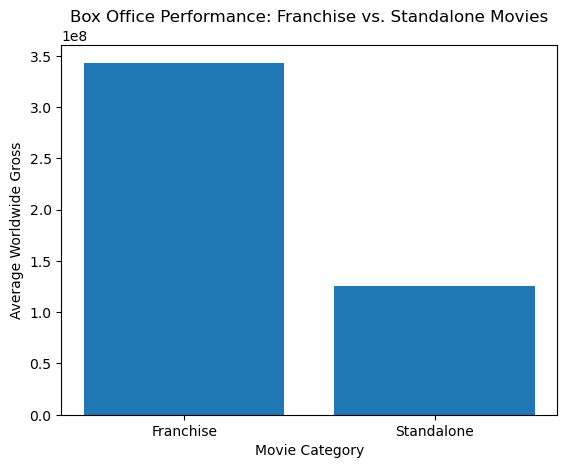

In [219]:
import matplotlib.pyplot as plt

# Creating a bar chart to compare average worldwide gross
categories = ['Franchise', 'Standalone']
avg_worldwide_gross = [avg_worldwide_gross_franchise, avg_worldwide_gross_standalone]

plt.bar(categories, avg_worldwide_gross)
plt.xlabel('Movie Category')
plt.ylabel('Average Worldwide Gross')
plt.title('Box Office Performance: Franchise vs. Standalone Movies')
plt.show()


The chart illustrates the average worldwide gross earnings for two movie categories: franchise and standalone.
The horizontal axis (x-axis) represents the movie categories: "Franchise" and "Standalone."
The vertical axis (y-axis) represents the average worldwide gross earnings in dollars ($).
Franchise movies have a significantly higher average worldwide gross compared to standalone movies.
The data suggests that, on average, movies associated with a franchise tend to perform substantially better in terms of worldwide box office earnings compared to standalone movies.

# 2. Identifying the most common movie language

In [223]:
# creating a copy of original dataframe
popl_language = merged_bom_df_tmdb_df.copy()
popl_language.head()

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$312,433,331","$621,156,389"


In [224]:
language_counts = merged_bom_df_tmdb_df['original_language'].value_counts()
language_counts

original_language
en    1136
fr       7
hi       7
es       3
ko       3
tr       1
ar       1
de       1
ru       1
te       1
xx       1
hu       1
he       1
pl       1
th       1
fa       1
da       1
el       1
Name: count, dtype: int64

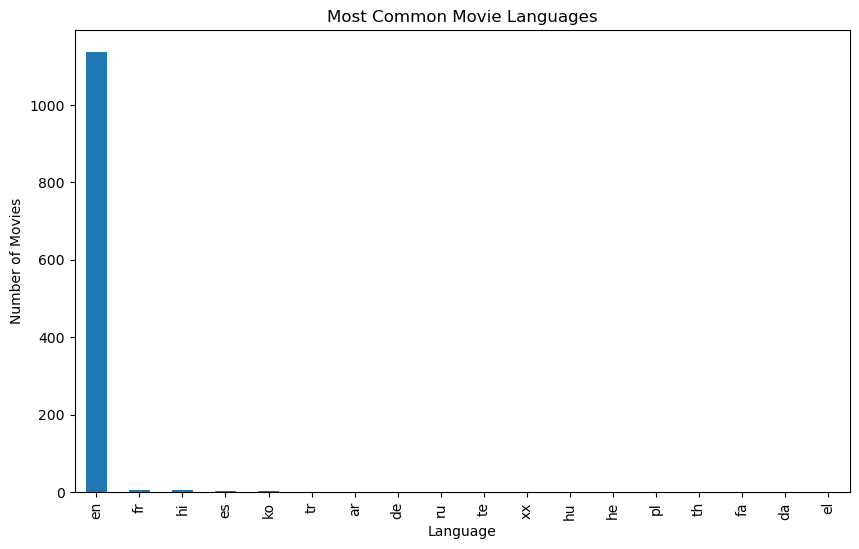

In [226]:
# plotting a bar chart
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')

plt.title('Most Common Movie Languages')
plt.xlabel('Language')
plt.ylabel('Number of Movies')

plt.show()


The chart illustrates the distribution of movies across various languages.
English, represented by the tallest bar, is by far the most common language in which movies are produced.
Other languages, indicated by shorter bars, have significantly fewer movies associated with them.
The data clearly illustrates that English dominates the film industry, serving as the primary language for a large majority of movies.
The substantial number of English-language movies suggests the global influence and reach of English-speaking cinema.

# 3. Investigating the relationship between production budget and gross earnings

In [222]:
# creating a copy of original dataframe
budget_df = franchise_success.copy()
budget_df

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,franchise
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$415,004,880","$1,068,879,522",Franchise
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$292,576,195","$835,524,642",Standalone
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$238,736,787","$756,244,673",Standalone
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$300,531,751","$706,102,828",Franchise
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$312,433,331","$621,156,389",Franchise
...,...,...,...,...,...,...,...,...,...,...,...
1264,Destroyer,Annapurna,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$1,533,324","$3,681,096",Standalone
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$4,286,367","$6,089,100",Standalone
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$490,973","$648,599",Franchise
1267,Mandy,RLJ,[18],en,0.600,3.5,2,"$6,000,000","$1,214,525","$1,427,656",Standalone


In [221]:
# Specifying the list of column names to select
new_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Creating a new DataFrame with only the selected columns
new_budget_df = budget_df[new_columns]
new_budget_df.head()

,production_budget,domestic_gross,worldwide_gross
0,"$200,000,000",415004880.0,1.068880e+09
1,"$160,000,000",292576195.0,8.355246e+08
2,"$165,000,000",238736787.0,7.562447e+08
3,"$68,000,000",300531751.0,7.061028e+08
4,"$170,000,000",312433331.0,6.211564e+08


In [220]:
new_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1169 entries, 0 to 1269
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  1169 non-null   float64
 1   domestic_gross     1169 non-null   float64
 2   worldwide_gross    1169 non-null   float64
dtypes: float64(3)
memory usage: 36.5 KB


In [233]:
new_budget_df['production_budget'] = new_budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
new_budget_df

C:\Users\user\AppData\Local\Temp\ipykernel_5928\4035561289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_budget_df['production_budget'] = new_budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)


,production_budget,domestic_gross,worldwide_gross
0,200000000.0,415004880.0,1.068880e+09
1,160000000.0,292576195.0,8.355246e+08
2,165000000.0,238736787.0,7.562447e+08
3,68000000.0,300531751.0,7.061028e+08
4,170000000.0,312433331.0,6.211564e+08
...,...,...,...
1264,9000000.0,1533324.0,3.681096e+06
1265,10000000.0,4286367.0,6.089100e+06
1266,30000000.0,490973.0,6.485990e+05
1267,6000000.0,1214525.0,1.427656e+06


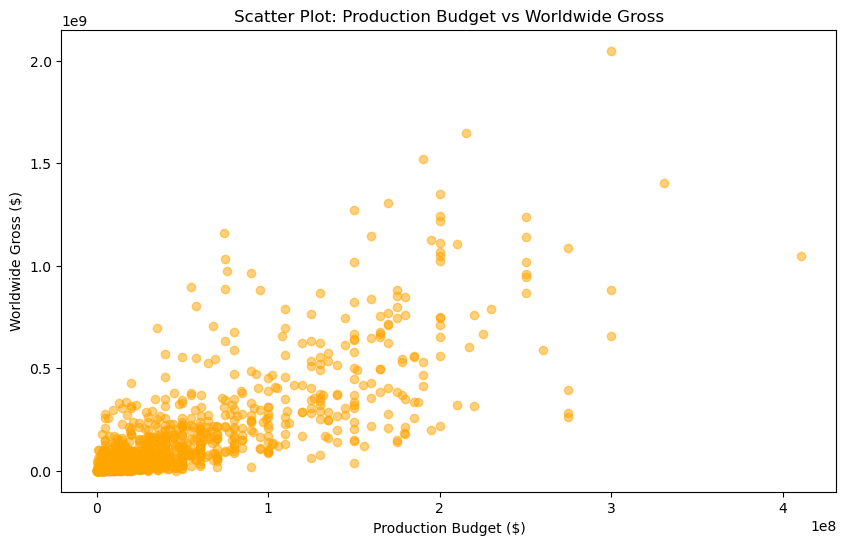

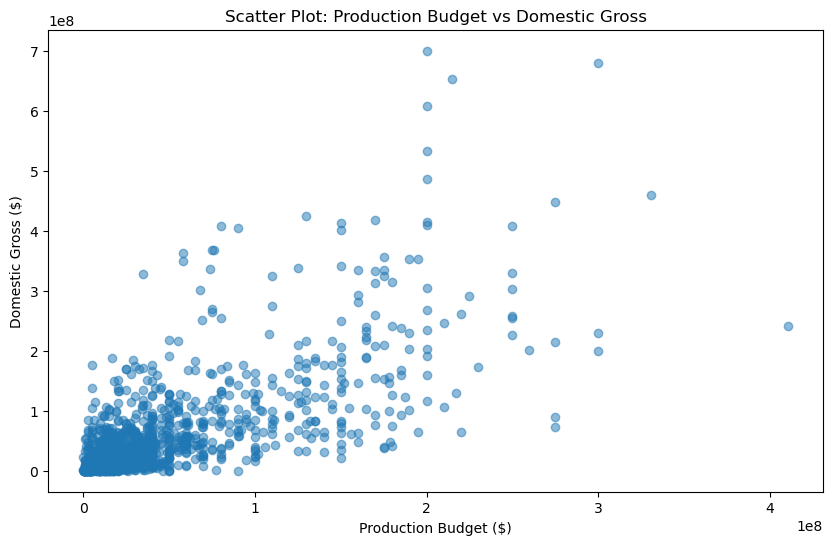

In [218]:
# Creating a scatter plot for 'Production Budget' vs 'Worldwide Gross'
plt.figure(figsize=(10, 6))
plt.scatter(new_budget_df['production_budget'], new_budget_df['worldwide_gross'], alpha=0.5, color='orange')
plt.title('Scatter Plot: Production Budget vs Worldwide Gross')

plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

plt.show()


# Creating a scatter plot for 'Production Budget' vs 'Domestic Gross'
plt.figure(figsize=(10, 6))
plt.scatter(new_budget_df['production_budget'], new_budget_df['domestic_gross'], alpha=0.5)
plt.title('Scatter Plot: Production Budget vs Domestic Gross')

plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')

plt.show()


These plots illustrate the relationship between production budgets and movie earnings, both domestically and worldwide.
In both plots, there is a concentration of movies with low budgets and correspondingly lower gross earnings.
However, movies with medium or higher budgets are spread out more evenly across different levels of gross earnings.
Some high-budget movies have achieved high gross earnings, while others have only reached average or lower gross figures.
The data suggests that a significant portion of movies operates within limited budgets, and their earnings tend to align with their budget levels.

# Conclusion 
The analysis conducted in this project yields valuable insights for microsoft's entry into the film industry.Here are the key takeways and recommendations::

Movie category(franchise & standalone) vs gross earnings - In conclusion,franchise movies have a substantially higher average worldwide gross compared to standalone movies, suggesting the potential advantages of investing in established franchises in the film industry.

Language analysis - In conclusion, the bar chart underscores the overwhelming prevalence of English-language movies in the film industry, highlighting the significance of English as a dominant language in global cinema.

Budget vs gross earnings -In summary, the scatter plots reveal that while the majority of movies are concentrated in the low-budget and lower-gross region, those with medium or higher budgets are scattered across various levels of gross earnings, emphasizing the complex relationship between production budgets and box office performance.